In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df_train=pd.read_csv('/opt/kate_repo/real_data_analysis/chem_tech_ai/train_data_200k.csv')

In [3]:
df_train.head(10)

,Unnamed: 0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,...,tag74,tag75,tag76,tag77,tag78,tag79,target1,target2,target3,target4
0,2016-08-18 00:00:00,15.78042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.02723,66.30531,55.10297,73.65612,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-08-18 00:01:00,15.80157,NaN,NaN,NaN,NaN,NaN,53.06440,NaN,NaN,...,53.05109,66.30098,55.11534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-08-18 00:02:00,15.68913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.06495,66.30359,55.09395,NaN,NaN,55.07365,NaN,NaN,NaN,NaN
3,2016-08-18 00:03:00,15.75101,NaN,20.26209,NaN,NaN,NaN,52.95166,NaN,NaN,...,53.06760,66.28421,55.12513,NaN,92.46913,NaN,NaN,NaN,NaN,NaN
4,2016-08-18 00:04:00,15.57773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.09679,66.26472,55.15526,73.67016,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-08-18 00:05:00,15.57733,NaN,NaN,NaN,NaN,NaN,52.95227,47.23787,NaN,...,53.07378,66.28927,55.15840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-08-18 00:06:00,15.61941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.06260,66.27256,55.12681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-08-18 00:07:00,15.62034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.02694,66.28844,55.13467,NaN,NaN,55.23989,NaN,NaN,NaN,NaN
8,2016-08-18 00:08:00,15.46382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.01671,66.27395,55.09196,73.62349,92.47112,NaN,NaN,NaN,NaN,NaN
9,2016-08-18 00:09:00,15.16291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.00344,66.27372,55.07862,NaN,NaN,NaN,0.00112,0.048361,0.944454,0.006065


In [4]:
df_train.shape

(200000, 84)

In [5]:
# количество строк с NaN
df_train.isnull().sum()

Unnamed: 0         0
tag1              66
tag2           90630
tag3           90544
tag4          199915
               ...  
tag79         151442
target1            9
target2            9
target3            9
target4            9
Length: 84, dtype: int64

In [6]:
# Удаление строк с NaN для столбцов Target_1...4
df_train=df_train.dropna(subset=['target1'])

In [7]:
# Заполнение отсутствующих данных значением 0
df_train= df_train.fillna(0)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 9 to 199999
Data columns (total 84 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  199991 non-null  object 
 1   tag1        199991 non-null  float64
 2   tag2        199991 non-null  float64
 3   tag3        199991 non-null  float64
 4   tag4        199991 non-null  float64
 5   tag5        199991 non-null  float64
 6   tag6        199991 non-null  float64
 7   tag7        199991 non-null  float64
 8   tag8        199991 non-null  float64
 9   tag9        199991 non-null  float64
 10  tag10       199991 non-null  float64
 11  tag11       199991 non-null  float64
 12  tag12       199991 non-null  float64
 13  tag13       199991 non-null  float64
 14  tag14       199991 non-null  float64
 15  tag15       199991 non-null  float64
 16  tag16       199991 non-null  float64
 17  tag17       199991 non-null  float64
 18  tag18       199991 non-null  float64
 19  ta

In [9]:
# корректировка формата даты для Unnamed: 0
df_train['Unnamed: 0'] = pd.to_datetime(df_train['Unnamed: 0'])

In [10]:
# Удаление выбросов с нулевым значением признака target1

# len(df_train[df_train['target1']>0.000)

In [11]:
# Описательная статистика
df_train['target1'].describe()

count    199991.000000
mean          0.001156
std           0.000085
min           0.000826
25%           0.001101
50%           0.001155
75%           0.001206
max           0.001865
Name: target1, dtype: float64

/home/kate/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target1'>

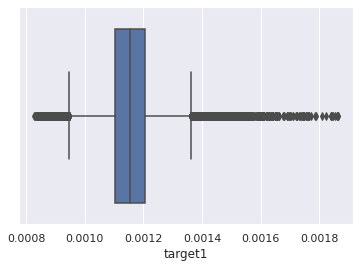

In [12]:
# Распределение параметра target1
sns.boxplot(df_train['target1'], orient='h')

<AxesSubplot:>

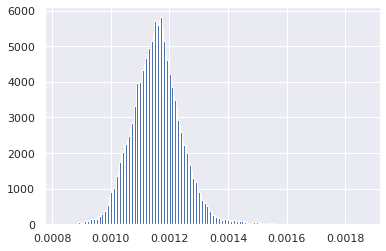

In [13]:
df_train['target1'].hist(bins=200)

<AxesSubplot:>

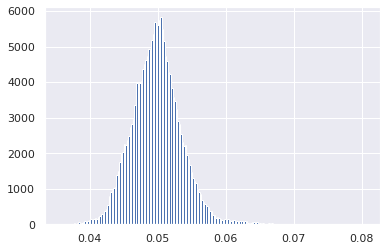

In [14]:
df_train['target2'].hist(bins=200)

/home/kate/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target2'>

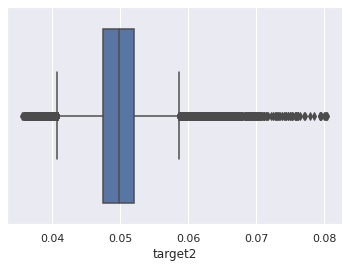

In [15]:
sns.boxplot(df_train['target2'], orient='h')

<AxesSubplot:>

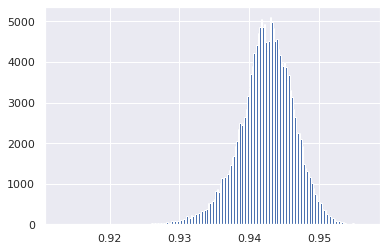

In [16]:
df_train['target3'].hist(bins=200)

/home/kate/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target3'>

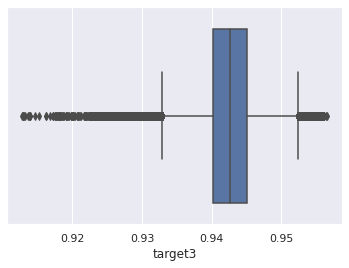

In [17]:
sns.boxplot(df_train['target3'], orient='h')

<AxesSubplot:>

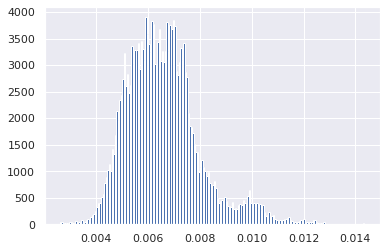

In [18]:
df_train['target4'].hist(bins=200)

/home/kate/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target4'>

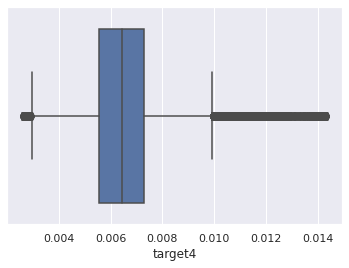

In [19]:
sns.boxplot(df_train['target4'], orient='h')

Подбор коэффициентов для регрессионного анализа
1. Линейная зависимость переменных
2. Нормальность распределения остатков
3. Гетероскедастичность
4. Мультиколлинеарность
5. Нормальное распределение переменных

In [24]:
# Расчет корреляции Кендалла
# tags=df_train.drop(df_train.columns[[80,81,82,83]],axis=1)
tags=df_train[["tag1","tag2","tag3","tag4"]]
targets=df_train[["target1","target2","target3","target4"]]
coef, p = kendalltau(tags, targets)

print('Kendall correlation coefficient: %.3f' % coef)
# Интерпретация значений корреляции
alpha = 0.05
if p > alpha:
    print('Выборки не коррелируют(fail to reject H0) p=%.3f' % p)
else:
    print('Выборки коррелируют (reject H0) p=%.3f' % p)

Kendall correlation coefficient: -0.157
Samples are correlated (reject H0) p=0.000


In [64]:
from sklearn import linear_model as lm

import statsmodels.api as sm

target1 = df_train['target1']
res = sm.OLS(target1, df_train.iloc[:,1:-4], missing='drop').fit()

In [65]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                target1   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.107e+06
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                        0.00
Time:                        20:36:14   Log-Likelihood:                      1.7368e+06
No. Observations:              199991   AIC:                                 -3.473e+06
Df Residuals:                  199915   BIC:                                 -3.473e+06
Df Model:                          76                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tag1        7.088e-06   8.63e-08     82.166      0.000    6.92e-06    7.26e-06
tag2         1.82e-05   7.26e-06      2.509      0.012    3.98e-06    3.24e-05
tag3       -6.244e-08   4.15e-08     -1.505      0.132   -1.44e-07    1.89e-08
tag4        5.346e-07   3.36e-07      1.590      0.112   -1.24e-07    1.19e-06
tag5        4.291e-08   1.35e-08      3.186      0.001    1.65e-08    6.93e-08
tag6        1.159e-07   3.07e-08      3.777      0.000    5.57e-08    1.76e-07
tag7       -1.364e-08   4.04e-09     -3.378      0.001   -2.16e-08   -5.73e-09
tag8        1.028e-07   7.66e-09     13.421      0.000    8.78e-08    1.18e-07
tag9        1.063e-07   2.99e-08      3.561      0.000    4.78e-08    1.65e-07
tag10        7.17e-07   3.06e-08     23.398      0.000    6.57e-07    7.77e-07
tag11       1.222e-07   1.23e-08      9.931      0.000    9.81e-08    1.46e-07
tag12          0.0003   3.65e-05      9.401      0.000       0.000       0.000
tag13         -0.0034      0.000    -29.516      0.000      -0.004      -0.003
tag14         -0.0005      0.000     -1.228      0.219      -0.001       0.000
tag15         -0.0604      0.002    -38.279      0.000      -0.064      -0.057
tag16         -0.0527      0.007     -7.426      0.000      -0.067      -0.039
tag17         -0.0083      0.007     -1.214      0.225      -0.022       0.005
tag18         -0.0012      0.000     -3.436      0.001      -0.002      -0.001
tag19      -5.008e-07   2.52e-08    -19.908      0.000    -5.5e-07   -4.52e-07
tag20      -4.117e-08   2.73e-08     -1.507      0.132   -9.47e-08    1.24e-08
tag21       3.581e-07   4.69e-08      7.644      0.000    2.66e-07     4.5e-07
tag22      -1.407e-07   2.97e-08     -4.732      0.000   -1.99e-07   -8.24e-08
tag23       8.516e-06   2.77e-07     30.781      0.000    7.97e-06    9.06e-06
tag24      -8.003e-07   8.47e-08     -9.444      0.000   -9.66e-07   -6.34e-07
tag25       1.489e-06   1.01e-07     14.806      0.000    1.29e-06    1.69e-06
tag26       5.993e-07   8.95e-08      6.698      0.000    4.24e-07    7.75e-07
tag27      -2.997e-06   1.06e-07    -28.341      0.000    -3.2e-06   -2.79e-06
tag28       2.005e-06   1.01e-07     19.853      0.000    1.81e-06     2.2e-06
tag29       1.267e-06   1.58e-07      8.035      0.000    9.58e-07    1.58e-06
tag30      -1.629e-06   1.49e-07    -10.915      0.000   -1.92e-06   -1.34e-06
tag31      -2.374e-07   1.55e-07     -1.536      0.124    -5.4e-07    6.55e-08
tag32       2.833e-06   6.04e-08     46.909      0.000    2.71e-06    2.95e-06
tag33       1.258e-07   1.11e-07      1.133      0.257   -9.19e-08    3.43e-07
tag34      -1.266e-06   4.29e-08    -29.498      0.000   -1.35e-06   -1.18e-06
tag35       9.264e-07   1.19e-07      7.759      0.000    6.9